In [1]:
!pip install pandas
!pip install scikit-fuzzy

In [2]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Read dataset from diabetes.csv
data=pd.read_csv('diabetes.csv')

In [4]:
# Get dataset columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Get dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Print value from dataset
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [7]:
# Get info about dataset
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Check whether the dataset contains null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Find max value
data.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [11]:
# Find min value
data.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [12]:
# Initialize
pregnancies = ctrl.Antecedent(np.arange(0, 18, 1), 'pregnancies')
glucose = ctrl.Antecedent(np.arange(0, 198, 1), 'glucose')
bPressure = ctrl.Antecedent(np.arange(0, 123, 1), 'bPressure')
sThickness = ctrl.Antecedent(np.arange(0, 61, 1), 'sThickness')
insulin = ctrl.Antecedent(np.arange(0, 847, 1), 'insulin')
bmi = ctrl.Antecedent(np.arange(0, 67.2, 0.1), 'bmi')
dPFunc = ctrl.Antecedent(np.arange(0.084, 2.330, 0.01), 'dPFunc')
age = ctrl.Antecedent(np.arange(21, 70, 1), 'age')
output = ctrl.Consequent(np.arange(0, 2, 1), 'output')

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


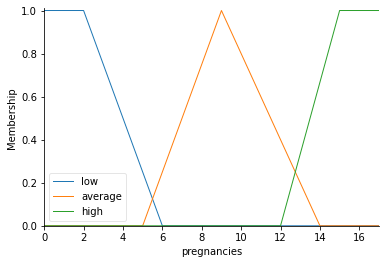

In [13]:
pregnancies['low'] = fuzz.trapmf(pregnancies.universe, [0, 0, 2, 6])
pregnancies['average'] = fuzz.trimf(pregnancies.universe, [5, 9, 14])
pregnancies['high'] = fuzz.trapmf(pregnancies.universe, [12, 15, 17, 17])
pregnancies.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


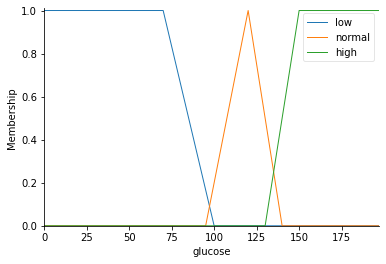

In [14]:
glucose['low'] = fuzz.trapmf(glucose.universe, [0, 0, 70, 100])
glucose['normal'] = fuzz.trimf(glucose.universe, [95, 120, 140])
glucose['high'] = fuzz.trapmf(glucose.universe, [130, 150, 197, 197])
glucose.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


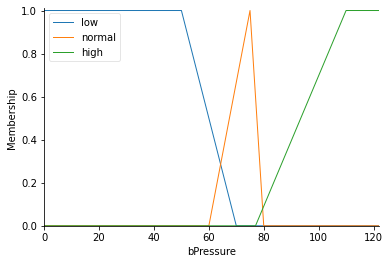

In [15]:
bPressure['low'] = fuzz.trapmf(bPressure.universe, [0, 0, 50, 70])
bPressure['normal'] = fuzz.trimf(bPressure.universe, [60, 75, 80])
bPressure['high'] = fuzz.trapmf(bPressure.universe, [77, 110, 122, 122])
bPressure.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


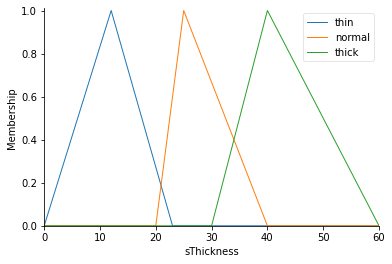

In [16]:
sThickness['thin'] = fuzz.trimf(sThickness.universe, [0, 12, 23])
sThickness['normal'] = fuzz.trimf(sThickness.universe, [20, 25, 40]) 
sThickness['thick'] = fuzz.trimf(sThickness.universe, [30, 40, 60])
sThickness.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


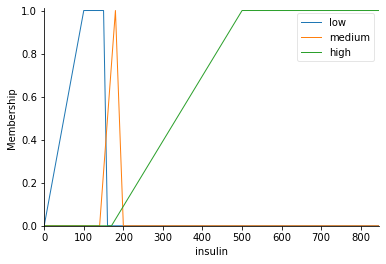

In [17]:
insulin['low'] = fuzz.trapmf(insulin.universe, [0, 100, 150, 160])
insulin['medium'] = fuzz.trimf(insulin.universe, [140, 180, 200])
insulin['high'] = fuzz.trapmf(insulin.universe, [170, 500, 846, 846])
insulin.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


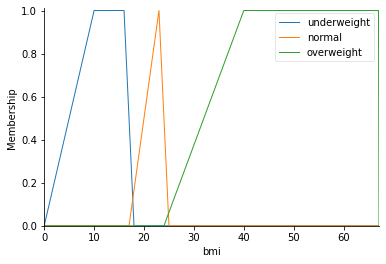

In [18]:
bmi['underweight'] = fuzz.trapmf(bmi.universe, [0, 10, 16, 18])
bmi['normal'] = fuzz.trimf(bmi.universe, [17, 23, 25])
bmi['overweight'] = fuzz.trapmf(bmi.universe, [24, 40, 67.1, 67.1])
bmi.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


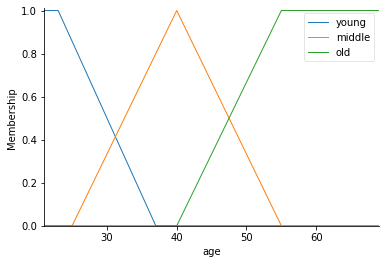

In [19]:
age['young'] = fuzz.trapmf(age.universe, [21, 21, 23, 37])
age['middle'] = fuzz.trimf(age.universe, [25, 40, 55])
age['old'] = fuzz.trapmf(age.universe, [40, 55, 69, 69])
age.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


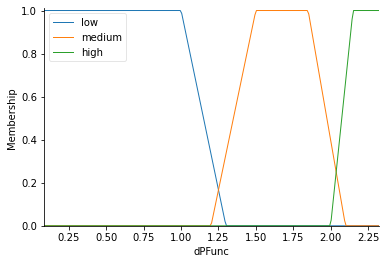

In [20]:
dPFunc['low'] = fuzz.trapmf(dPFunc.universe, [0.084, 0.084, 1.0, 1.3])
dPFunc['medium'] = fuzz.trapmf(dPFunc.universe, [1.2, 1.5, 1.85, 2.1])
dPFunc['high'] = fuzz.trapmf(dPFunc.universe, [2, 2.15, 2.329, 2.329])
dPFunc.view()

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


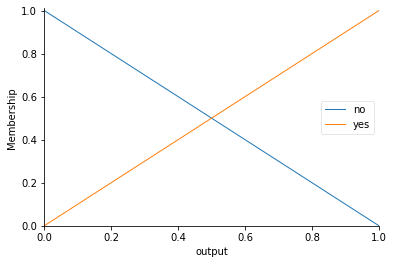

In [21]:
output['no'] = fuzz.trimf(output.universe, [0, 0, 0])
output['yes'] = fuzz.trimf(output.universe, [1, 1, 1])
output.view()

In [22]:
rule1 = ctrl.Rule(glucose['high'] & insulin['low'], output['yes'])

rule2 = ctrl.Rule(sThickness['thick'] & glucose['high'], output['yes'])

rule3 = ctrl.Rule(dPFunc['high'] & age['middle'], output['yes'])

rule4 = ctrl.Rule(bPressure['normal'] & bmi['overweight'], output['yes'])

rule5 = ctrl.Rule(pregnancies['low'] & glucose['high'] & age['old'], output['yes'])

rule6 = ctrl.Rule(pregnancies['average'] & glucose['high'] & bPressure['normal'], output['yes'])

rule7 = ctrl.Rule(pregnancies['high'] & bPressure['normal'] & bmi['overweight'] & age['old'], output['yes'])

rule8 = ctrl.Rule(dPFunc['low'] & glucose['high'] & insulin['high'] & bmi['overweight'], output['yes'])

rule9 = ctrl.Rule(pregnancies['low'] & glucose['low'] & age['young'], output['no'])

rule10 = ctrl.Rule(pregnancies['low'] & glucose['normal'] & dPFunc['low'], output['no'])

rule11 = ctrl.Rule(sThickness['thin'] & bmi['normal'] & dPFunc['low'], output['no'])

rule12 = ctrl.Rule(bPressure['low'] & insulin['low'] & age['young'], output['no'])

rule13 = ctrl.Rule(insulin['medium'] & age['middle'], output['no'])

rule14 = ctrl.Rule(glucose['low'] & sThickness['normal'], output['no'])

rule15 = ctrl.Rule(dPFunc['medium'] & bPressure['normal'], output['no'])

rule16 = ctrl.Rule(pregnancies['average'] & bmi['underweight'], output['no'])

rule17 = ctrl.Rule(dPFunc['low'] & age['middle'], output['no'])

rule18 = ctrl.Rule(glucose['normal'] & bPressure['high'], output['no'])

rule19 = ctrl.Rule(glucose['high'] | pregnancies['high'], output['yes'])

rule20 = ctrl.Rule(dPFunc['high'] | insulin['high'], output['yes'])

rule21 = ctrl.Rule((bPressure['low'] & sThickness['thin'] & insulin['low'] & bmi['underweight']) | glucose['normal'], output['no'])

rule22 = ctrl.Rule((dPFunc['low'] | glucose['normal']) & (sThickness['thin'] | insulin['low']), output['no'])

rule23 = ctrl.Rule((glucose['low'] | pregnancies['low']) & (sThickness['thin'] | bPressure['low']), output['no'])

rule24 = ctrl.Rule(insulin['medium'] | bmi['overweight'] | dPFunc['high'], output['yes'])

rule25 = ctrl.Rule((insulin['high'] & glucose['high']) | (dPFunc['high'] & bmi['overweight']) & age['middle'], output['yes'])

In [23]:
# Add all the rules into control system
diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, 
                                    rule20, rule21, rule22, rule23, rule24, rule25])

In [24]:
diabetes = ctrl.ControlSystemSimulation(diabetes_ctrl)

0.5827171809756593


C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


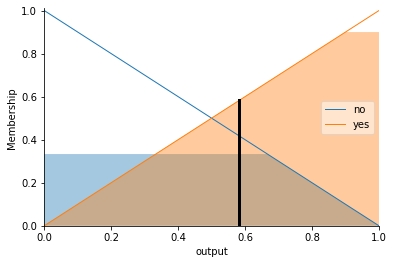

In [25]:
#Data row 2 - Outcome = 1
diabetes.input['pregnancies'] = 6
diabetes.input['glucose'] = 148
diabetes.input['bPressure'] = 72
diabetes.input['sThickness'] = 35
diabetes.input['insulin'] = 0
diabetes.input['bmi'] = 33.6
diabetes.input['dPFunc'] = 0.627
diabetes.input['age'] = 50

diabetes.compute()
print (diabetes.output['output'])
output.view(sim=diabetes)

In [26]:
# Auto Tester
i = 0
t = 0

# Use all rows
r = 768

while (i < r):
    p = data.loc[i,'Pregnancies']
    g = data.loc[i,'Glucose']
    bp = data.loc[i,'BloodPressure']
    st = data.loc[i,'SkinThickness']
    ins = data.loc[i,'Insulin']
    bmi = data.loc[i,'BMI']
    dp = data.loc[i,'DiabetesPedigreeFunction']
    age = data.loc[i,'Age']
    outcome = data.loc[i, 'Outcome']
    
    diabetes.input['pregnancies'] = p
    diabetes.input['glucose'] = g
    diabetes.input['bPressure'] = bp
    diabetes.input['sThickness'] = st
    diabetes.input['insulin'] = ins
    diabetes.input['bmi'] = bmi
    diabetes.input['dPFunc'] = dp
    diabetes.input['age'] = age
    diabetes.compute()
    if ((diabetes.output['output'] >= 0.51) & (outcome == 1)):
        tRes = "✔️"
        t+=1
    elif ((diabetes.output['output'] < 0.51) & (outcome == 0)):
        tRes = "✔️"
        t+=1
    else:
        tRes = "❌" 
    print (i+2, diabetes.output['output'], outcome, tRes, sep="   ")
    i+=1
print("")
print(t, "/", r)
print("Accuracy = ", t/r*100,"%")

while (i < r):
    data.loc[i,'Classification Result'] = diabetes.output['output']
    data.to_csv("project.csv",index=False)
    i+=1
    
pd.read_csv("project.csv")

2   0.5827171809756593   1   ✔️
3   0.4323308270676692   0   ✔️
4   0.5692368525108739   1   ✔️
5   0.40151936551042056   0   ✔️
6   0.5   1   ❌
7   0.3707936507936508   0   ✔️
8   0.4325007780613755   1   ❌
9   0.48582317073170733   0   ✔️
10   0.6275343072155821   1   ✔️
11   0.35   1   ❌
12   0.5391891891891892   0   ❌
13   0.55   1   ✔️
14   0.5875   0   ❌
15   0.5666666666666667   1   ✔️
16   0.5812487288997356   1   ✔️
17   0.4834546336729743   1   ❌
18   0.5074358974358973   1   ❌
19   0.4763636363636365   1   ❌
20   0.5   0   ✔️
21   0.46206932272377255   1   ❌
22   0.5318495358432183   0   ❌
23   0.5627707147342959   0   ❌
24   0.5060931899641578   1   ❌
25   0.4112287608803535   1   ❌
26   0.47718926553672314   1   ❌
27   0.42860632904121887   1   ❌
28   0.5182473074730748   1   ✔️
29   0.3333333333333333   0   ✔️
30   0.4722222222222222   0   ✔️
31   0.46348668219420963   0   ✔️
32   0.5347465787476777   0   ❌
33   0.6114942528735632   1   ✔️
34   0.35130718954248363   0   ✔

278   0.4415829084729304   1   ❌
279   0.39658078670018077   0   ✔️
280   0.3660816457730632   0   ✔️
281   0.4214946983912953   0   ✔️
282   0.6062972853643251   1   ✔️
283   0.4713700369344413   0   ✔️
284   0.4510713690178422   0   ✔️
285   0.5609609609609609   1   ✔️
286   0.43486256871564216   1   ❌
287   0.40853994490358125   0   ✔️
288   0.55   0   ❌
289   0.5035294117647059   1   ❌
290   0.3806818181818181   0   ✔️
291   0.5009487084727301   0   ✔️
292   0.5106650985948252   0   ❌
293   0.507045940061493   1   ❌
294   0.55   1   ✔️
295   0.5   1   ❌
296   0.5   0   ✔️
297   0.5   0   ✔️
298   0.585982905982906   1   ✔️
299   0.4513386759011527   0   ✔️
300   0.5333333333333334   1   ✔️
301   0.3591919191919192   0   ✔️
302   0.5   1   ❌
303   0.46521739130434786   1   ❌
304   0.5119038485135505   0   ❌
305   0.5212121212121211   1   ✔️
306   0.5212121212121211   0   ❌
307   0.4983939628482973   0   ✔️
308   0.5   1   ❌
309   0.41673455532926007   0   ✔️
310   0.55   1   ✔️
311 

551   0.5212121212121211   0   ❌
552   0.3988495804115416   0   ✔️
553   0.43290421836099036   0   ✔️
554   0.412769317540891   0   ✔️
555   0.486947504860661   0   ✔️
556   0.4795762108262109   0   ✔️
557   0.38412698412698404   0   ✔️
558   0.5814866266971477   0   ❌
559   0.4335877862595421   0   ✔️
560   0.5131944444444444   0   ❌
561   0.45184723117238823   0   ✔️
562   0.4760199829437531   1   ❌
563   0.6114942528735632   1   ✔️
564   0.5107271525367708   0   ❌
565   0.43005331302360994   0   ✔️
566   0.5411971830985915   0   ❌
567   0.3762756136452015   0   ✔️
568   0.6136949511397675   0   ❌
569   0.4333333333333333   0   ✔️
570   0.5   0   ✔️
571   0.45974249546429163   1   ❌
572   0.44087286881056104   0   ✔️
573   0.38888888888888884   0   ✔️
574   0.45015407190022005   0   ✔️
575   0.4606289097408401   0   ✔️
576   0.6364197530864197   0   ❌
577   0.4678938356164384   0   ✔️
578   0.3333333333333333   0   ✔️
579   0.5074358974358973   1   ❌
580   0.404075135307227   0   ✔️


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Classification Result
0,6,148,72,35,0,33.6,0.627,50,1,0.582717
1,1,85,66,29,0,26.6,0.351,31,0,0.432331
2,8,183,64,0,0,23.3,0.672,32,1,0.569237
3,1,89,66,23,94,28.1,0.167,21,0,0.401519
4,0,137,40,35,168,43.1,2.288,33,1,0.500000
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.602905
764,2,122,70,27,0,36.8,0.340,27,0,0.487771
765,5,121,72,23,112,26.2,0.245,30,0,0.373533
766,1,126,60,0,0,30.1,0.349,47,1,0.446442
